In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
eta = 0.0001
epsilon = 0.001
max_iteration = 500
images_df = pd.read_csv("hw02_images.csv", header=None)
labels_df = pd.read_csv("hw02_labels.csv", header=None)
W = pd.read_csv("initial_W.csv", header=None)
w0 = pd.read_csv("initial_w0.csv", header=None)
encoded_labels = pd.DataFrame(OneHotEncoder(categories='auto').fit_transform(labels_df).toarray())

In [3]:
train, test = images_df[0:500], images_df[500:1000]
encoded_labels_train, encoded_labels_test = encoded_labels[0:500], encoded_labels[500:1000]

In [4]:
train = np.array(train)
test = np.array(test)
encoded_labels_train = np.array(encoded_labels_train)
encoded_labels_test = np.array(encoded_labels_test)
W = np.array(W)
w0 = np.array(w0)

In [5]:
def safeLog(x):
    return np.log(x+1e-100)

In [6]:
def sigmoid(X, w, w0):
    return (1 / (1 + np.exp(-(np.matmul(X, w) + w0.T))))

In [7]:
def gradient_w(X, y_true, y_predicted):
    return (-np.matmul(X.T, np.array(y_true - y_predicted)))

In [8]:
def gradient_w0(y_true, y_predicted):
    return(-np.sum(y_true - y_predicted))

In [9]:
iteration = 1
objective_values = []
while(iteration < 500):
    y_predicted = sigmoid(train, W, w0)
    W_old = W
    w0_old = w0
    W = W - eta * gradient_w(train, encoded_labels_train, y_predicted)
    w0 = w0 - eta * gradient_w0(encoded_labels_train, y_predicted)
    objective_values.append(-np.sum(encoded_labels_train * safeLog(y_predicted)))
    if(np.sqrt(np.sum(w0-w0_old)**2 + np.sum(W-W_old)**2) < epsilon):
        break
    iteration = iteration + 1


In [10]:
print(confusion_matrix(pd.DataFrame(y_predicted).values.argmax(axis=1)+1, labels_df[0:500]))

[[100   2   8   0   0]
 [  0  80   1   0   0]
 [  7   4 103   0   1]
 [  0   0   0 100   0]
 [  0   0   0   0  94]]


In [11]:
y_test_predicted = sigmoid(test, W, w0)
print(confusion_matrix(pd.DataFrame(y_test_predicted).values.argmax(axis=1)+1, labels_df[500:1000]))

[[ 82   1   4   0   1]
 [  0  87   0   0   0]
 [ 14   3  99   0   3]
 [  0   0   0 103   1]
 [  3   0   2   0  97]]


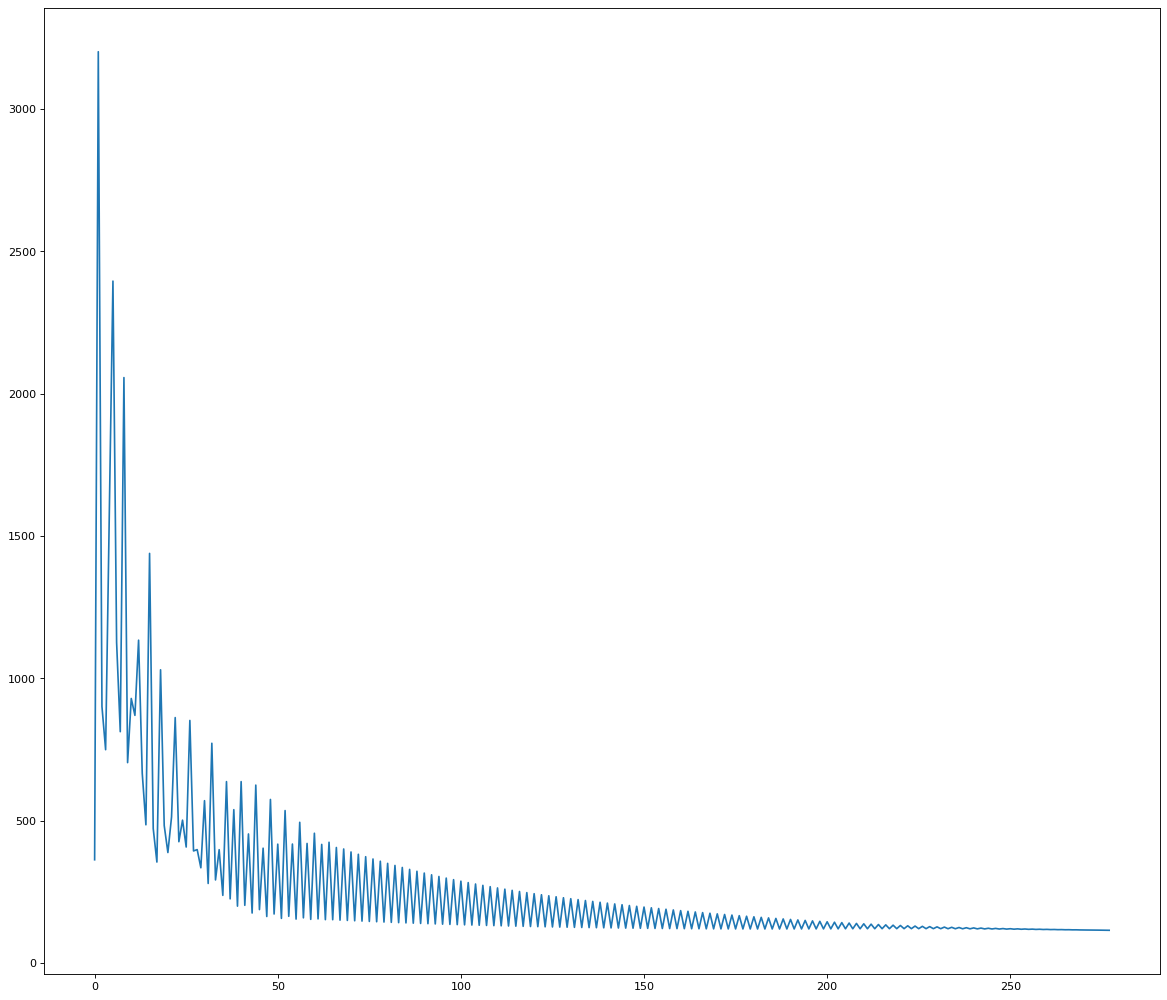

In [12]:
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pd.DataFrame(objective_values))